# MACHINE LEARNING

## Final Practical

### Submitted To : Prof.Shifali Sharma
### Submitted By : Hrithik Johri ( 18BCS6145 )


#### Importing required libraries

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv("6.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df.drop(['X1 transaction date'],axis=1,inplace=True)

## data visualization

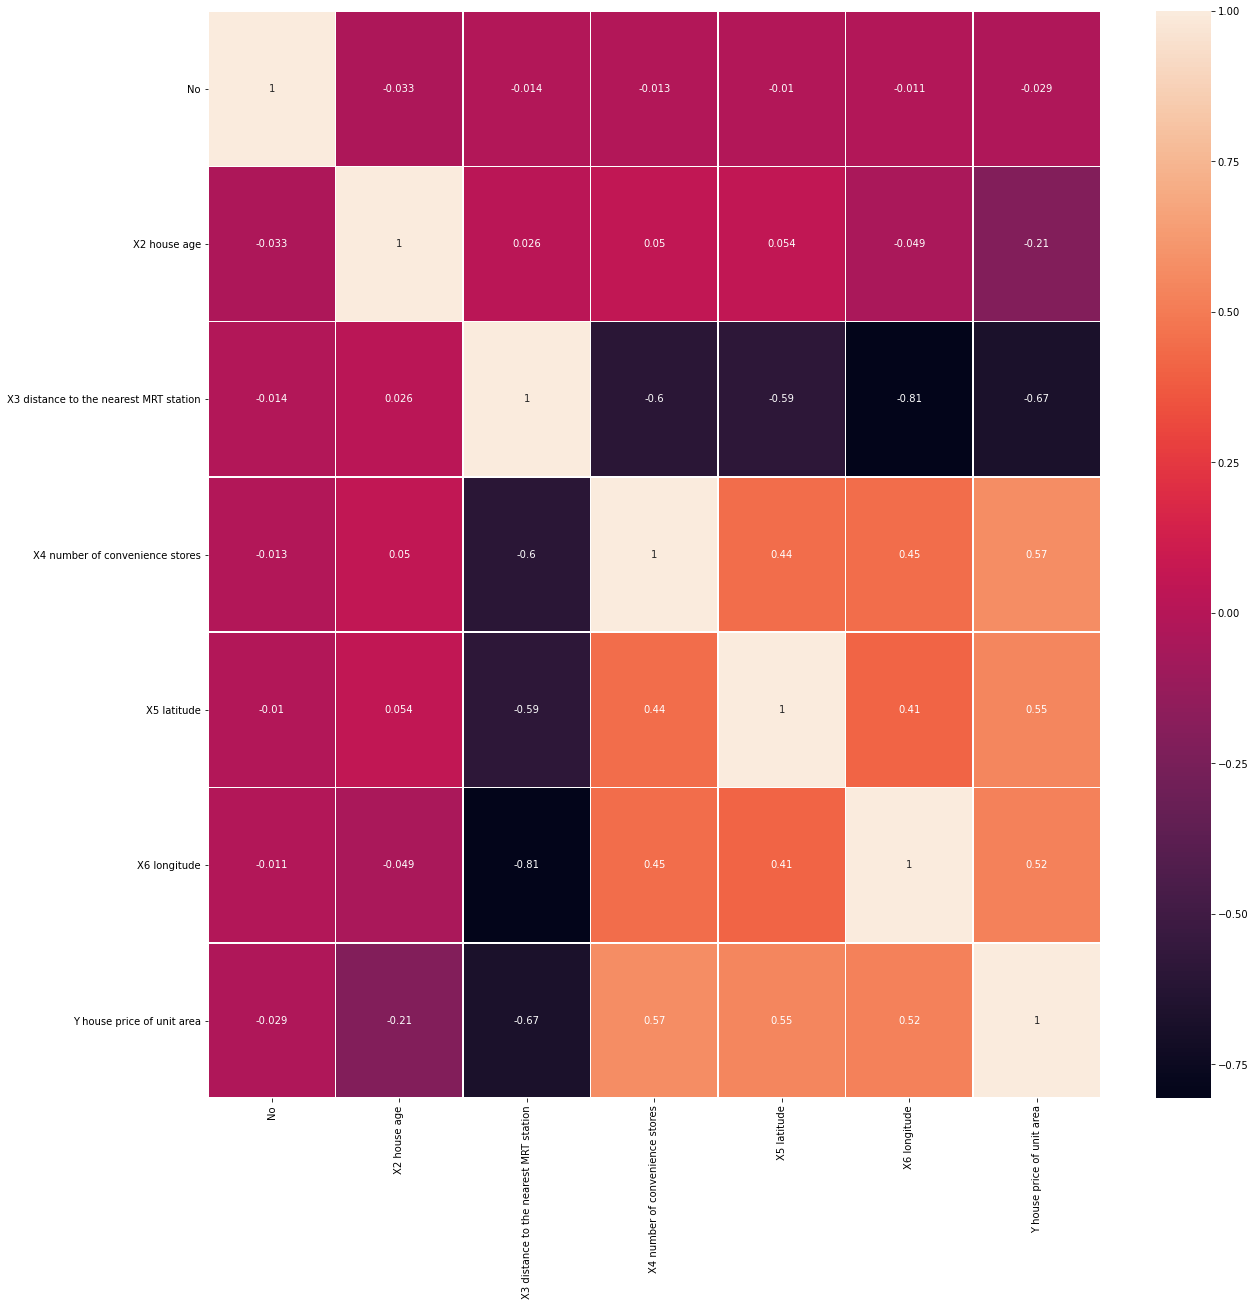

In [7]:
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

In [8]:
corr_mat=df.corr()

In [9]:
corr_mat["Y house price of unit area"].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

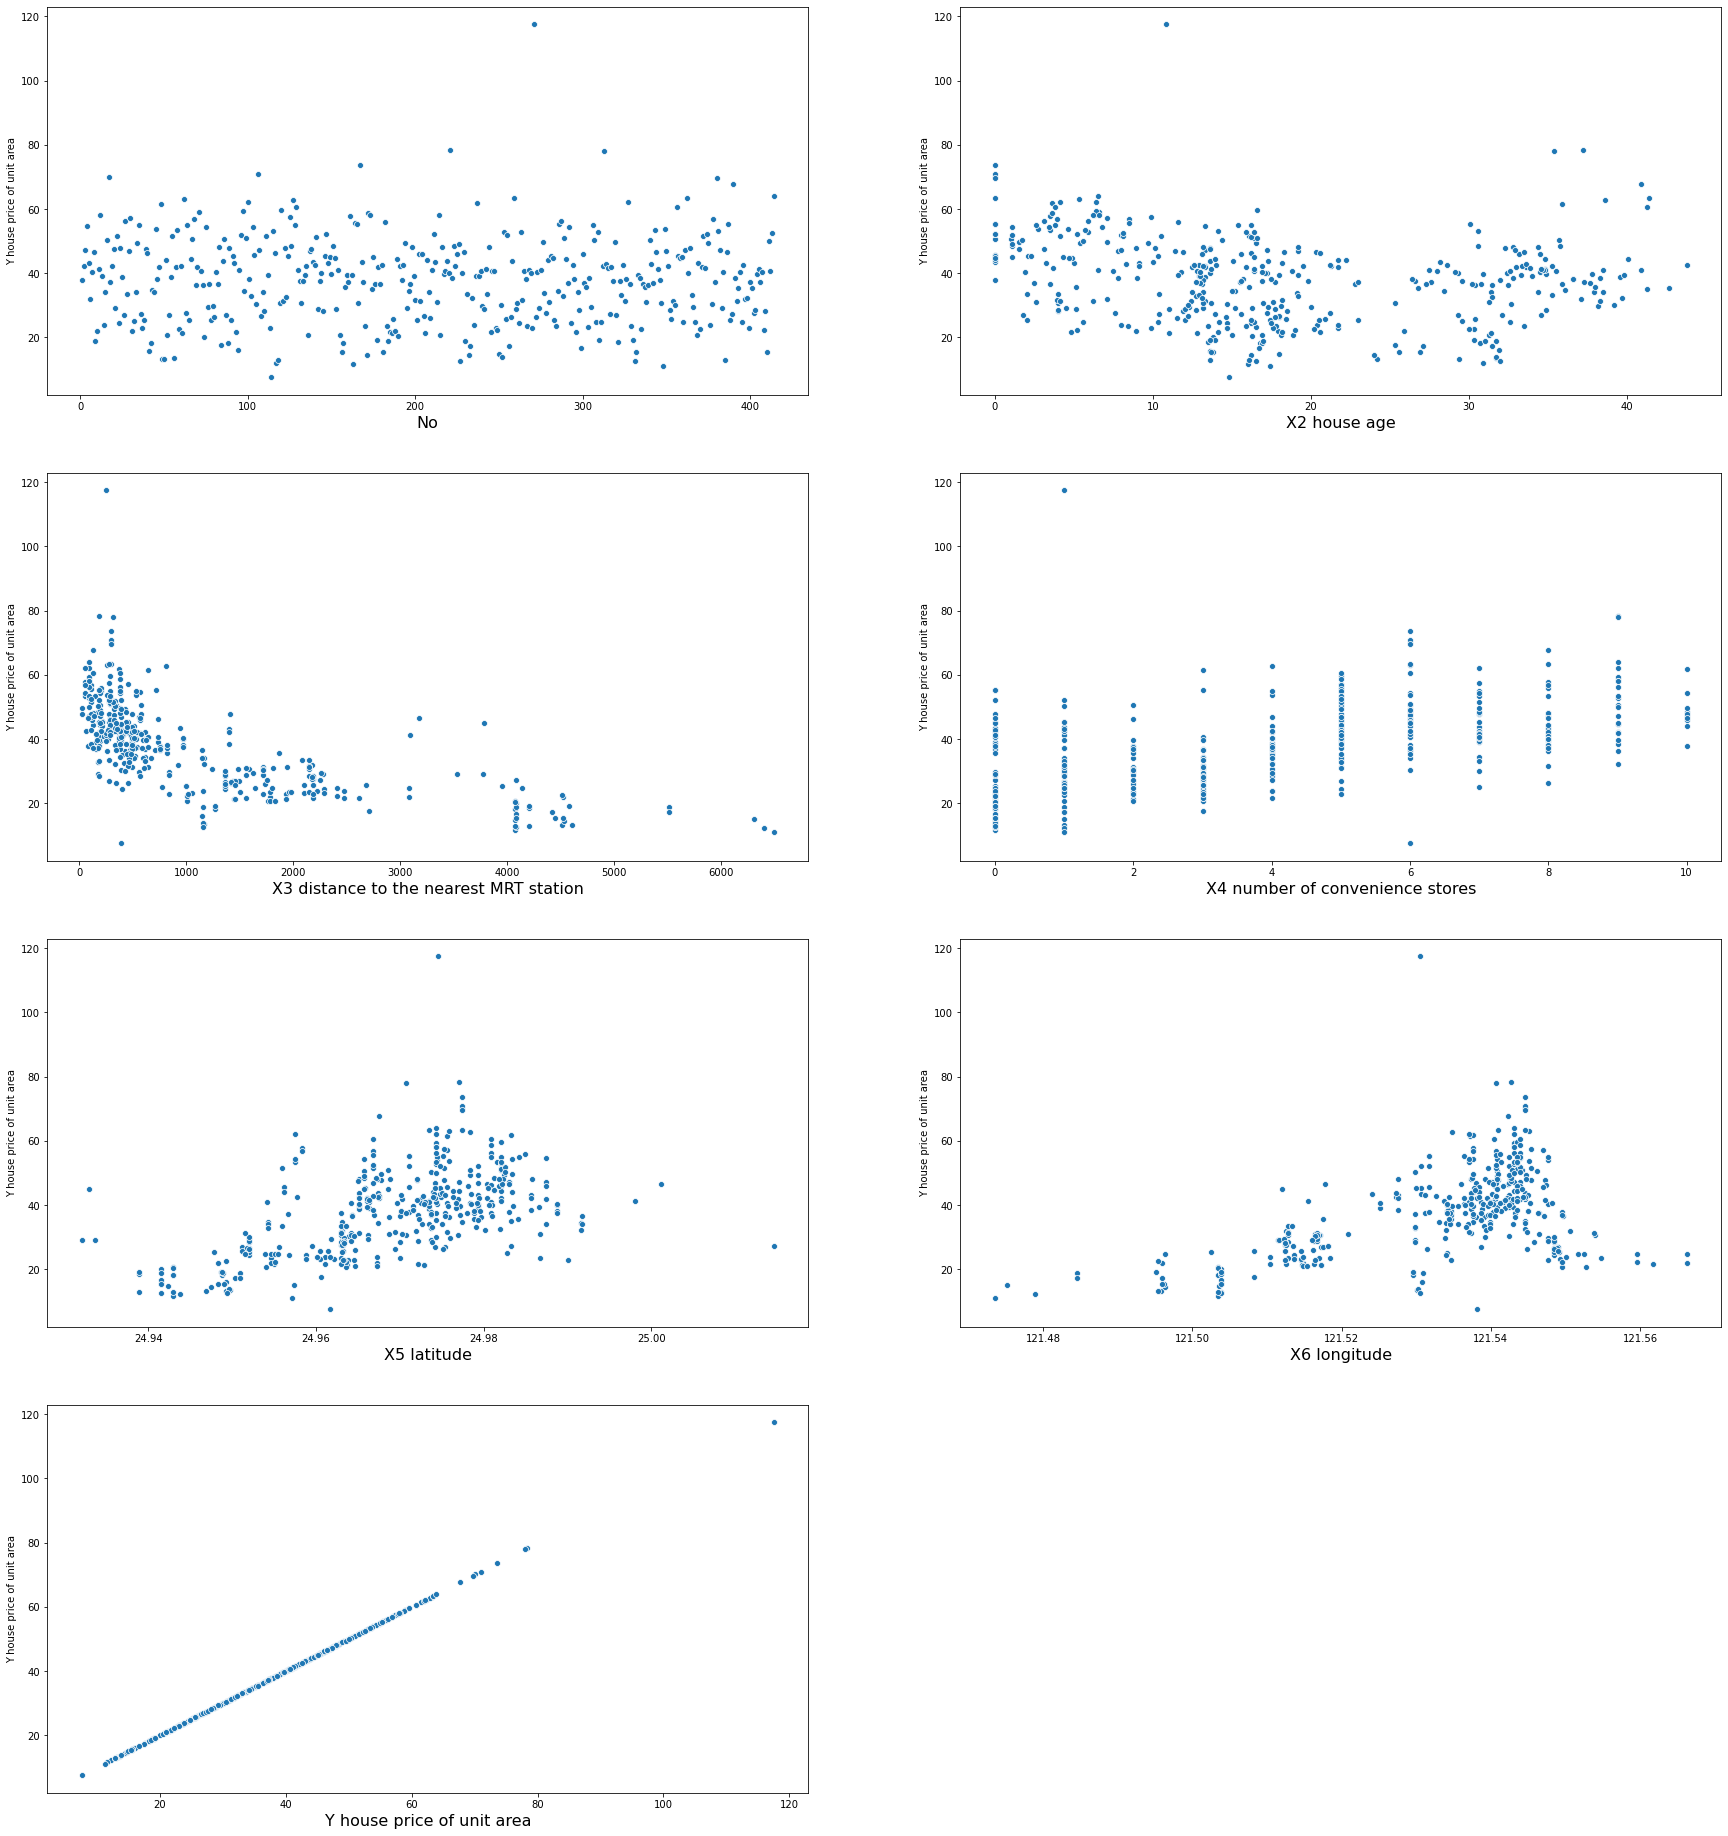

In [10]:
plt.figure(figsize=(30,50))
j=1
for i in df.columns :
  plt.subplot(6,2,j)
  sns.scatterplot(x=i,y="Y house price of unit area",data=df)
  plt.xlabel(i,fontsize=16)
  j=j+1

In [11]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
num_vars = ['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude','Y house price of unit area']
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,2,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,3,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,4,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,5,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732


In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['No']=lb.fit_transform(df['No'])
df.head()

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,1,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,2,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,3,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,4,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732


In [13]:
train, test= train_test_split(df, train_size = 0.7 ,test_size = 0.3 , random_state = 100)

In [ ]:
x=train.drop(['Y house price of unit area'], axis=1)
y=train['Y house price of unit area']
X_test=test.drop(['Y house price of unit area'], axis=1)
y_test=test['Y house price of unit area']

## model building

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

## lasso regression

In [16]:
lasso = Lasso()
lasso.fit(x,y)
train_score=lasso.score(x,y)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x,y)
train_score001=lasso001.score(x,y)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x,y)
train_score00001=lasso00001.score(x,y)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score: 0.002490438490523217
test score:  -0.03711661188886861
number of features used:  1
training score for alpha=0.01: 0.5423595164437109
test score for alpha =0.01:  0.6636360557778882
number of features used: for alpha =0.01: 5
training score for alpha=0.0001: 0.5431260777916265
test score for alpha =0.0001:  0.6615405116360038
number of features used: for alpha =0.0001: 6


In [17]:
lasso_1 = Lasso(alpha=0.0001, max_iter=10e5)
rfe = RFE(lasso_1, 5)
rfe = rfe.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [18]:
list(zip(x.columns,rfe.support_, rfe.ranking_))

[('No', False, 2),
 ('X2 house age', True, 1),
 ('X3 distance to the nearest MRT station', True, 1),
 ('X4 number of convenience stores', True, 1),
 ('X5 latitude', True, 1),
 ('X6 longitude', True, 1)]

In [19]:
col = x.columns[rfe.support_]
col

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [20]:
X_train_rfe = x[col]
lasso_1.fit(X_train_rfe,y)
train_score_1=lasso_1.score(X_train_rfe,y)
#test_score_1=lasso_1.score(X_test,y_test)
coeff_used_1 = np.sum(lasso_1.coef_!=0)
print ("training score for alpha=0.0001:", train_score_1 )
#print ("test score for alpha =0.0001: ", test_score_1)
print ("number of features used: for alpha =0.0001:", coeff_used_1)

training score for alpha=0.0001: 0.5419694770056035
number of features used: for alpha =0.0001: 5


### Final Evaluation

In [21]:
lasso = Lasso()
lasso.fit(x,y)
train_score=lasso.score(x,y)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x,y)
train_score001=lasso001.score(x,y)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x,y)
train_score00001=lasso00001.score(x,y)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score: 0.002490438490523217
test score:  -0.03711661188886861
number of features used:  1
training score for alpha=0.01: 0.5423595164437109
test score for alpha =0.01:  0.6636360557778882
number of features used: for alpha =0.01: 5
training score for alpha=0.0001: 0.5431260777916265
test score for alpha =0.0001:  0.6615405116360038
number of features used: for alpha =0.0001: 6
